# DataFrames

In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
from numpy.random import randn

In [5]:
df = pd.DataFrame(randn(5,4),index="A B C D E".split(),columns="W X Y Z".split())

In [6]:
df

,W,X,Y,Z
A,0.219490,1.095172,1.119989,-0.326390
B,1.231488,-0.587512,0.482890,-2.144013
C,1.044324,0.176765,-0.362973,1.088214
D,-0.294526,-0.259064,-1.279710,-1.623125
E,0.783891,0.621211,-0.520288,1.342216


In [5]:
df["W"]

A    0.352523
B    0.062908
C    0.364848
D   -0.046342
E   -1.421472
Name: W, dtype: float64

In [6]:
# pass a list of Columns names 
df [["W","Z"]]

,W,Z
A,0.352523,0.562686
B,0.062908,0.368168
C,0.364848,1.249713
D,-0.046342,-1.369327
E,-1.421472,0.714141


In [7]:
# SQL Syntax
df.W

A    0.352523
B    0.062908
C    0.364848
D   -0.046342
E   -1.421472
Name: W, dtype: float64

In [8]:
type(df["W"])

pandas.core.series.Series

## Creating New Columns

In [9]:
df["new"]=df["W"]+df["Y"]

In [10]:
df

,W,X,Y,Z,new
A,0.352523,-0.449035,0.522298,0.562686,0.874821
B,0.062908,-0.891786,0.648851,0.368168,0.711759
C,0.364848,-0.479686,-0.194896,1.249713,0.169951
D,-0.046342,1.404750,-0.442031,-1.369327,-0.488373
E,-1.421472,0.961966,-0.972431,0.714141,-2.393902


## Removing Columns

In [11]:
 df.drop("new",axis=1) # df.drop("new",axis=1,inplace=True) inplace to apply on the data 

,W,X,Y,Z
A,0.352523,-0.449035,0.522298,0.562686
B,0.062908,-0.891786,0.648851,0.368168
C,0.364848,-0.479686,-0.194896,1.249713
D,-0.046342,1.404750,-0.442031,-1.369327
E,-1.421472,0.961966,-0.972431,0.714141


In [12]:
 df.drop("new",axis=1,inplace=True)

In [13]:
df

,W,X,Y,Z
A,0.352523,-0.449035,0.522298,0.562686
B,0.062908,-0.891786,0.648851,0.368168
C,0.364848,-0.479686,-0.194896,1.249713
D,-0.046342,1.404750,-0.442031,-1.369327
E,-1.421472,0.961966,-0.972431,0.714141


In [14]:
df.drop("E",axis=0,inplace=True) # Removing the Row E and apply the action to the data

In [15]:
df

,W,X,Y,Z
A,0.352523,-0.449035,0.522298,0.562686
B,0.062908,-0.891786,0.648851,0.368168
C,0.364848,-0.479686,-0.194896,1.249713
D,-0.046342,1.404750,-0.442031,-1.369327


In [16]:
df.loc["A"]

W    0.352523
X   -0.449035
Y    0.522298
Z    0.562686
Name: A, dtype: float64

In [17]:
df.iloc[2,]

W    0.364848
X   -0.479686
Y   -0.194896
Z    1.249713
Name: C, dtype: float64

In [18]:
df.loc["B","Y"]

0.6488514054401725

In [19]:
df.iloc[1:3,:]

,W,X,Y,Z
B,0.062908,-0.891786,0.648851,0.368168
C,0.364848,-0.479686,-0.194896,1.249713


In [20]:
df>0

,W,X,Y,Z
A,True,False,True,True
B,True,False,True,True
C,True,False,False,True
D,False,True,False,False


In [21]:
df[df>0]

,W,X,Y,Z
A,0.352523,NaN,0.522298,0.562686
B,0.062908,NaN,0.648851,0.368168
C,0.364848,NaN,NaN,1.249713
D,NaN,1.40475,NaN,NaN


In [22]:
df["X"]>0

A    False
B    False
C    False
D     True
Name: X, dtype: bool

In [23]:
df[df[["W","Y"]]>80]

,W,X,Y,Z
A,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN


## Dictionaries

In [24]:
data={"Company":["GOOG","GOOG","MSFT","MSFT","FB","FB"],
      "Person":["Sam","Charlie","Amy","Vanessa","Carl","Sarah"],
      "Sales":[200,120,340,124,243,350]
     }

In [25]:
df= pd.DataFrame(data)

In [26]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [27]:
df.groupby("Company")

In [28]:
by_comp=df.groupby("Company")


In [29]:
by_comp.mean()

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [30]:
by_comp.std()

,Sales
Company,
FB,75.660426
GOOG,56.568542
MSFT,152.735065


In [31]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [32]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


In [33]:
by_comp.count() # massing data in MSFT Row Cause U Enter Nan Value

,Person,Sales
Company,,
FB,2,2
GOOG,2,2
MSFT,2,2


In [37]:
by_comp.describe()

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [36]:
by_comp.describe().transpose()

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

# Missing Data

In [112]:
df= pd.DataFrame({"A":[1,2,np.nan],
                  "B":[5,np.nan,np.nan],
                  "C":[1,2,3]})

In [113]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [114]:
df.dropna() # Drop the entire row where there is a missing value 

,A,B,C
0,1.0,5.0,1


In [115]:
df.dropna(axis=1) 

,C
0,1
1,2
2,3


In [116]:
df.dropna(thresh=2) # if there is 2 missing data in the row delete the entire row 

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [117]:
df.fillna(value="Fill Value")

,A,B,C
0,1.0,5.0,1
1,2.0,Fill Value,2
2,Fill Value,Fill Value,3


In [118]:
df["A"].fillna(value=df["A"].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

## Operations

In [86]:
df =pd.DataFrame({"col1":[1,2,3,4],"col2":[444,555,666,444],"col3":['abc','def','ghi','xyz']})
df.head()
df.tail()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [87]:
df["col2"].unique()  # هيرتب الحاجات و يشيل المتشابهه 

array([444, 555, 666], dtype=int64)

In [88]:
df["col2"].nunique() # عدد row الي متكررتش

3

In [89]:
#df["job_name"].value_counts().head(20)

## ِApplying Function

In [90]:
def times2(x):
    return x*2

In [91]:
df["col2"].apply(times2) 

0     888
1    1110
2    1332
3     888
Name: col2, dtype: int64

In [92]:
df["col3"].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [94]:
df["col1"].sum() #sum of column

10

In [95]:
del df["col1"] # Delete the column from excel sheet it self 

In [96]:
df

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [97]:
df.columns # return columns in the data

Index(['col2', 'col3'], dtype='object')

In [98]:
df.index # return number of rows int the data 

RangeIndex(start=0, stop=4, step=1)

In [99]:
df.sort_values(by="col2")

,col2,col3
0,444,abc
3,444,xyz
1,555,def
2,666,ghi


In [100]:
df.isnull() # check if there missing in data 

,col2,col3
0,False,False
1,False,False
2,False,False
3,False,False


In [101]:
df.info() # basic information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col2    4 non-null      int64 
 1   col3    4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


## Read Excel Sheet

In [102]:
#df = pd.read_csv('example.csv')
#df

## Save The CSV

In [103]:
#df.to_csv("example.csv",index=False)

## Excel Input

In [104]:
#pd.read_excel("Excel_sample.xlsx",sheetname="Sheet1")


## Excel output ( save ) 

In [119]:
#df.to_excel("Excel_Sample.xlsx",sheet_name="Sheet2")

# Distribution Plots

In [120]:
import seaborn as sns
%matplotlib inline

## Data

In [8]:
tips = sns.load_dataset('tips') # seaborn comes with built in data sets like tips

In [122]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\smart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

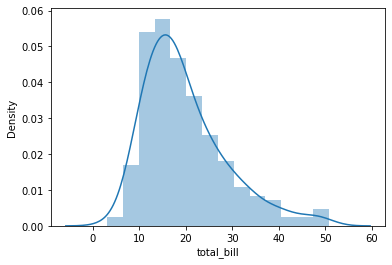

In [124]:
sns.distplot(tips["total_bill"])
# safe to ignore warnings 

C:\Users\smart\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

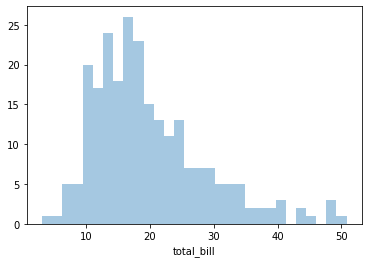

In [125]:
sns.distplot(tips["total_bill"],kde=False,bins=30)
# safe to ignore warnings 

######

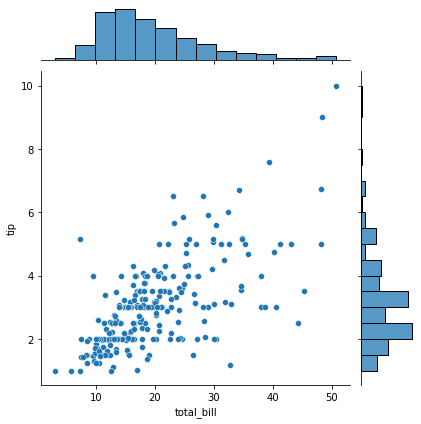

In [127]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="scatter")

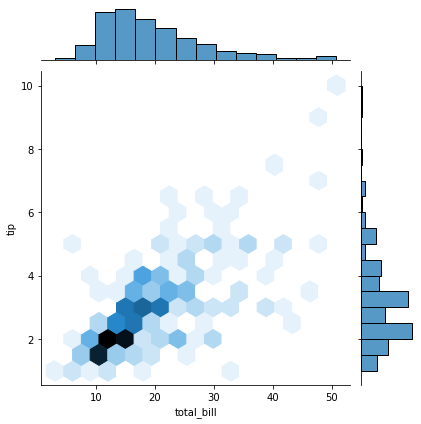

In [128]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="hex")

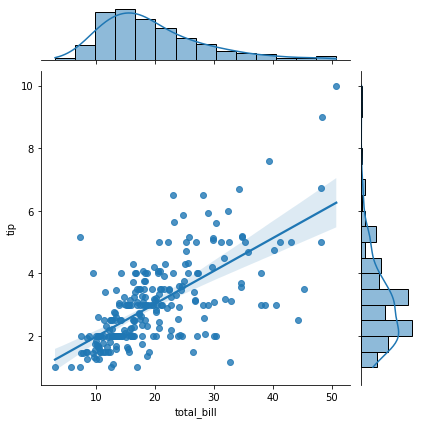

In [130]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="reg")

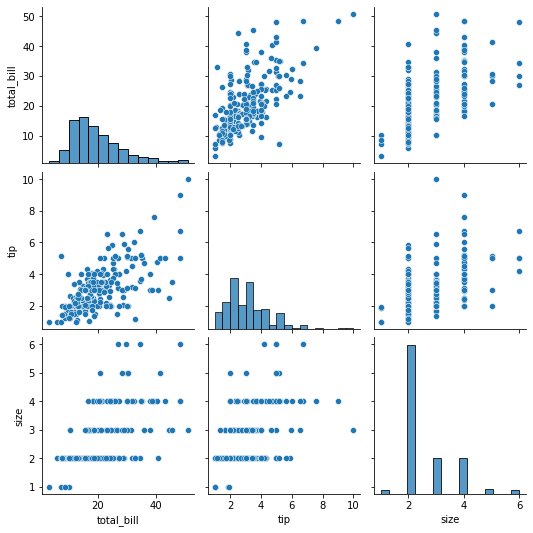

In [131]:
sns.pairplot(tips) # Relation between Numerical Columns ( Total bill , tips , size)

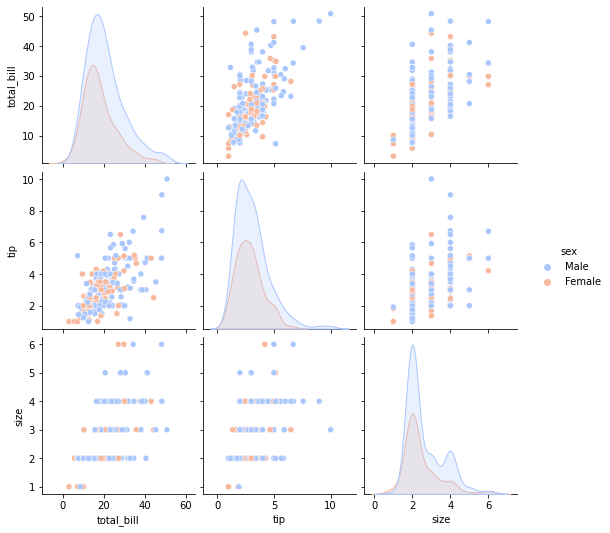

In [132]:
sns.pairplot(tips,hue="sex",palette="coolwarm") # Relational between Numerical data based on catigorical data (sex)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

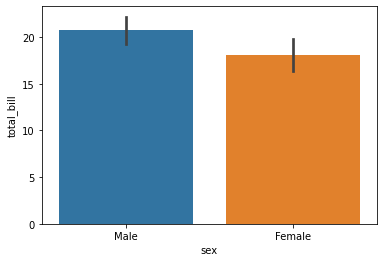

In [134]:
sns.barplot(x="sex",y="total_bill",data=tips) # Relation Between Catigorical Column and Numerical data default estimator is mean

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

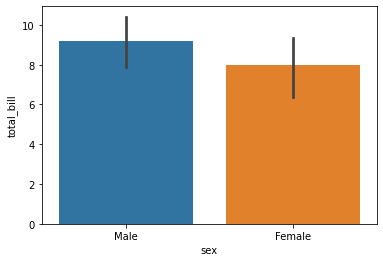

In [135]:
sns.barplot(x="sex",y="total_bill",data=tips,estimator=np.std) # Relation Between Catigorical Column and Numerical data 

<AxesSubplot:xlabel='sex', ylabel='count'>

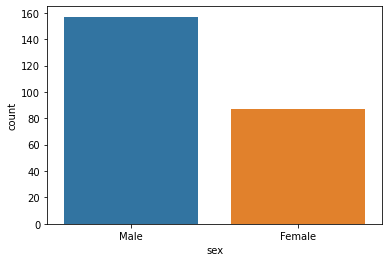

In [137]:
sns.countplot(x="sex",data=tips)

## BoxPlot 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

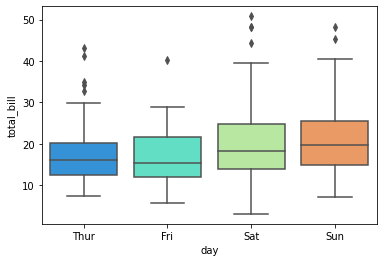

In [138]:
sns.boxplot(x="day",y="total_bill",data=tips,palette='rainbow')

<AxesSubplot:>

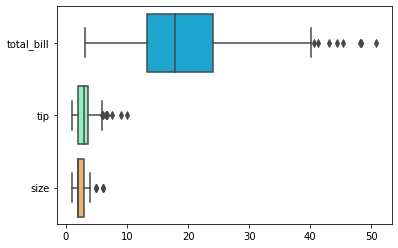

In [139]:
sns.boxplot(data=tips,palette='rainbow',orient="h")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

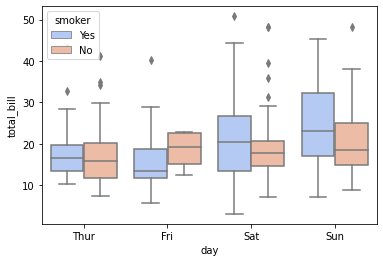

In [9]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

# HeatMap

In [11]:
flights = sns.load_dataset('flights')

In [12]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

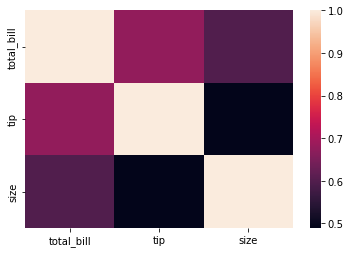

In [15]:
sns.heatmap(tips.corr())

<AxesSubplot:>

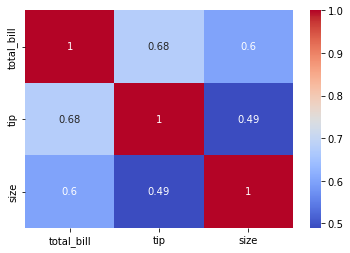

In [16]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

In [17]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

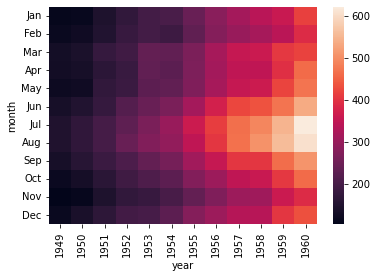

In [18]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

<AxesSubplot:xlabel='year', ylabel='month'>

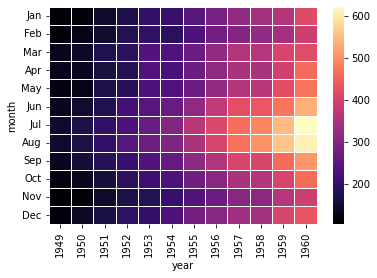

In [19]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

# Cluster Map 

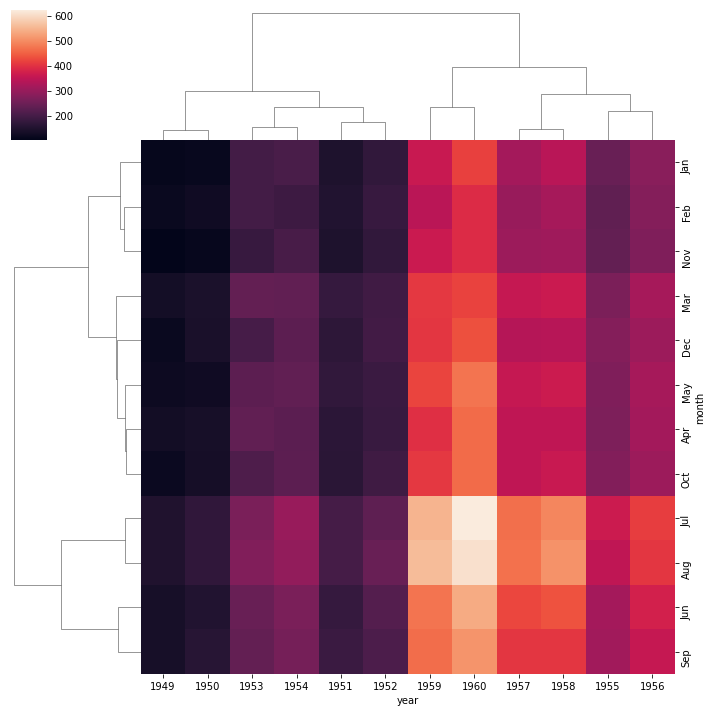

In [20]:
sns.clustermap(pvflights)

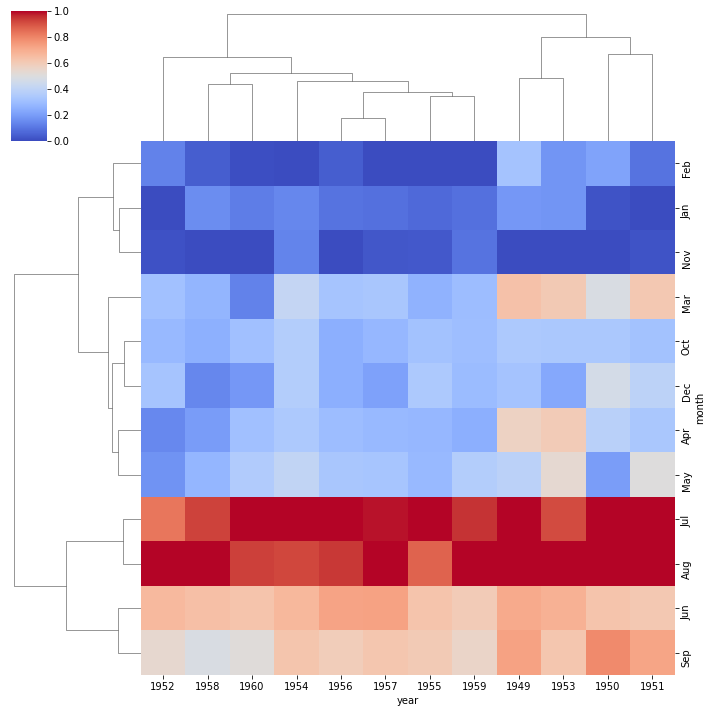

In [21]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)